In [1]:
import numpy as np
import cv2
import pytesseract as tess
from matplotlib import pyplot as plt
from PIL import Image

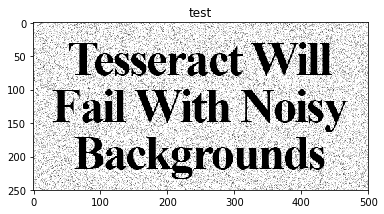

In [2]:
img = cv2.imread("ocr.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("test"); plt.show()

In [3]:
text = tess.image_to_string(img, lang='eng')

In [4]:
print(text)

_ Tesseract Will
Fail With Noisy
_ Backgrounds —


In [5]:
img = cv2.blur(img,(3,3))

In [6]:
test_blur_img = Image.fromarray(img)

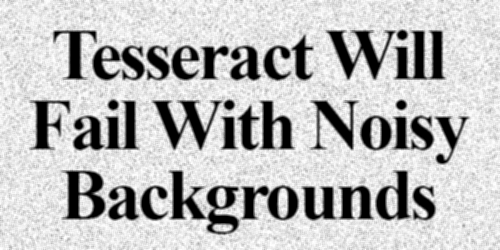

In [7]:
test_blur_img

In [8]:
text = tess.image_to_string(test_blur_img, lang='eng')

In [9]:
print(text)

Tesseract Will
Fail With Noisy
Backgrounds


In [35]:
img = cv2.imread("car3.jpg")

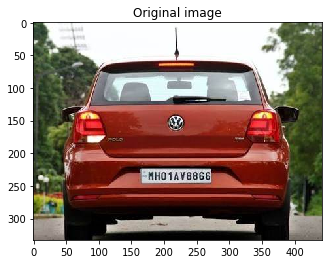

In [36]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original image"); plt.show()

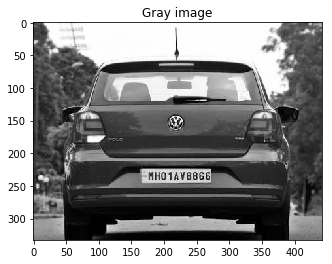

In [37]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.title("Gray image"); plt.show()

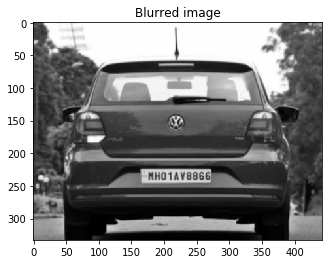

In [38]:
# Removing noise
blur = cv2.GaussianBlur(gray,(3,3),0)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.title("Blurred image"); plt.show()

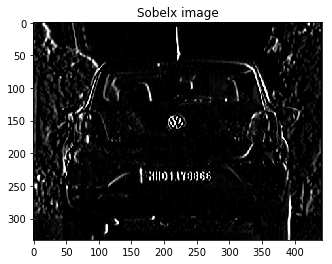

In [39]:
# First order derivative in x
sobelx = cv2.Sobel(blur,cv2.CV_8U,1,0,3)
plt.imshow(cv2.cvtColor(sobelx, cv2.COLOR_BGR2RGB))
plt.title("Sobelx image"); plt.show()

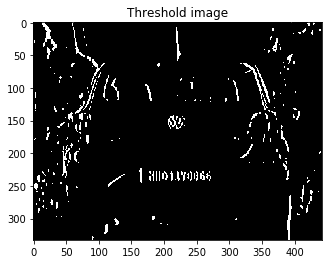

In [40]:
# Thresholding the image using OTSU's binarization
retthresh, thresholdimg = cv2.threshold(sobelx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(cv2.cvtColor(thresholdimg, cv2.COLOR_BGR2RGB))
plt.title("Threshold image"); plt.show()

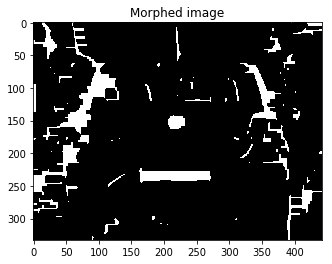

In [41]:
strele = cv2.getStructuringElement(shape=cv2.MORPH_RECT,ksize=(15,5))
morphimg = cv2.morphologyEx(thresholdimg,cv2.MORPH_CLOSE,kernel=strele)
plt.imshow(cv2.cvtColor(morphimg, cv2.COLOR_BGR2RGB))
plt.title("Morphed image"); plt.show()

In [42]:
contours,hierarchy = cv2.findContours(morphimg,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)

In [43]:
def ratioCheck(area, width, height):
    """This function inspects the ratio of the contour to ensure it meets the requirements 
    suitable to a real license plate"""
    ratio = float(width) / float(height)
    if ratio < 1:
        ratio = 1 / ratio

    aspect = 4.7272
    min = 15 * aspect * 15  # minimum area
    max = 125 * aspect * 125  # maximum area

    rmin = 3
    rmax = 6

    if (area < min or area > max) or (ratio < rmin or ratio > rmax):
        return False
    return True

In [44]:
def validateRotationAndRatio(rect):
    """Checks the angle of the rectangle potential license plate"""
    (x, y), (width, height), rect_angle = rect

    if(width>height):
        angle = -rect_angle
    else:
        angle = 90 + rect_angle

    if angle>15:
        return False

    if height == 0 or width == 0:
        return False

    area = height*width
    if not ratioCheck(area,width,height):
        return False
    else:
        return True

In [45]:
def detect(img,contours):
    for i,cnt in enumerate(contours):
        min_rect = cv2.minAreaRect(cnt)

        if validateRotationAndRatio(min_rect):

            x,y,w,h = cv2.boundingRect(cnt)
            plate_img = img[y:y+h,x:x+w]
            
            plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
            plt.title('DETECTED PLATE'); plt.show()
            
            ret, plate_img = cv2.threshold(plate_img,120,255,cv2.THRESH_BINARY)
            
            plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
            plt.title('Function Test'); plt.show()
            
            plate_im = Image.fromarray(plate_img)
            text = tess.image_to_string(plate_im, lang='eng')
            print("Detected Text : ", text)

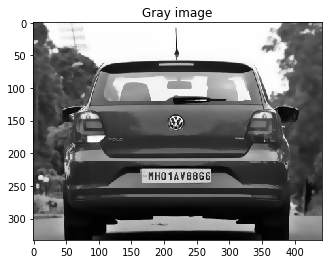

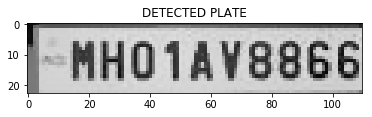

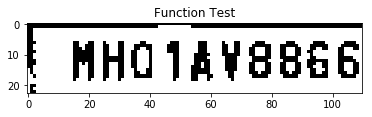

Detected Text :  MHO1A¥8866


In [46]:
fil = cv2.bilateralFilter(gray, 11, 17, 17)
plt.imshow(cv2.cvtColor(fil, cv2.COLOR_BGR2RGB))
plt.title("Gray image"); plt.show()
detect(fil,contours)